# EDA

final_traveler.csv 파일을 가볍게 살펴봅니다.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [65]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)              # 설정에 해당하는 rc params 변경

In [66]:
# # WSL2 font setting
# plt.rc('font', family='NanumGothic')
# plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

In [67]:
data_path = '../..//data/training/preprocessing/final_traveler.csv'
df = pd.read_csv(data_path)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
print('shape:', df.shape)


shape: (2560, 80)


In [68]:
df.head()

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION_CHECK,TRAVEL_PURPOSE_22,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,e_e000004,E03,e000004,3,2023-04-30,2023-05-01,NaN,서울 외 수도권 방문/수도권 거주/40세 이상/자녀동반/일반미션,3;4;11,0,...,2,5,경기도,경기,자녀 동반 여행,2023-04-29~2023-04-30,1,3,0,2
1,e_e000006,E03,e000006,21,2023-04-30,2023-05-02,NaN,경기 방문/거주지 구분 없음/39세 이하/특별미션,21;10;27,0,...,3,2,서울특별시,경기,2인 가족 여행,2023-04-30~2023-05-01,1,2,3,1
2,e_e000009,E03,e000009,2;4,2023-04-29,2023-05-01,NaN,서울 외 수도권 방문/수도권 거주/39세 이하/커플/일반미션,22;1;7,0,...,4,7,인천광역시,경기,2인 여행(가족 외),2023-04-29~2023-04-30,3,1,2,1
3,e_e000010,E01,e000010,3;6,2023-04-29,2023-05-01,NaN,서울 방문/수도권 외 거주/39세 이하/나홀로 여행/일반미션,6;3;1,0,...,5,3,경상남도,서울,나홀로 여행,2023-04-29~2023-04-30,8,1,2,0
4,e_e000011,E01,e000011,1;21,2023-04-28,2023-05-01,NaN,서울 방문/수도권 외 거주/40세 이상/커플/일반미션,6;2;24,0,...,6,6,경상남도,서울,3인 이상 여행(가족 외),2023-04-28~2023-04-30,3,7,1,3


In [69]:
# 활동, 숙박 관련 통계량
df[['activity_payment_sum', 'lodging_payment_sum', 'visit_trip_days']].describe()

,activity_payment_sum,lodging_payment_sum,visit_trip_days
count,"2,560","2,560","2,560"
mean,"148,345","43,377",2
std,"364,864","110,152",1
min,0,0,2
25%,"54,325",0,2
50%,"94,688",0,2
75%,"168,000",0,3
max,"15,071,450","1,320,000",6


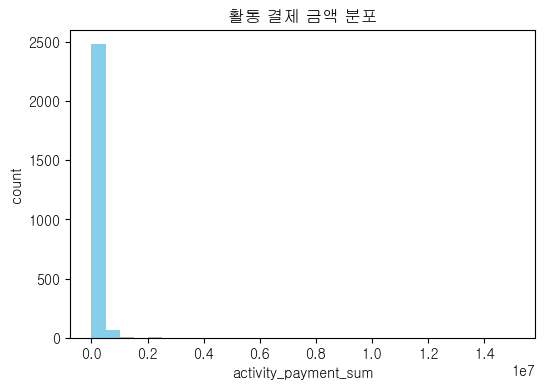

In [70]:
# 히스토그램
plt.figure(figsize=(6,4))
plt.hist(df['activity_payment_sum'], bins=30, color='skyblue')
plt.title('활동 결제 금액 분포')
plt.xlabel('activity_payment_sum')
plt.ylabel('count')
plt.show()

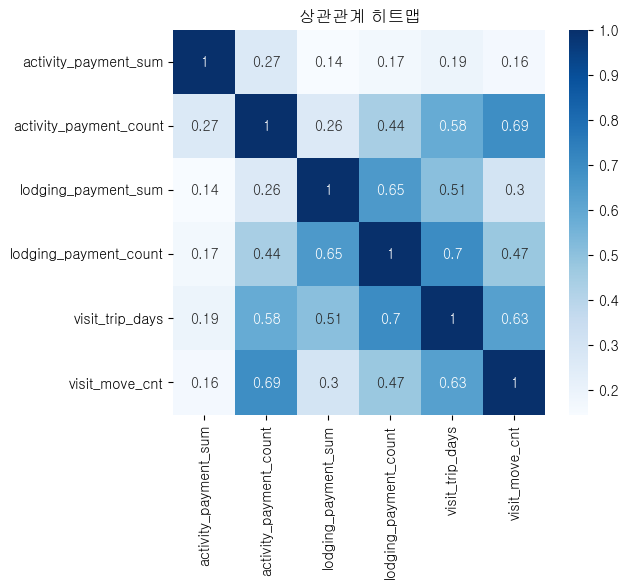

In [71]:
# heatmap으로 확인
simple_cols = ['activity_payment_sum', 'activity_payment_count', 'lodging_payment_sum', 'lodging_payment_count', 'visit_trip_days', 'visit_move_cnt']
corr = df[simple_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('상관관계 히트맵')
plt.show()

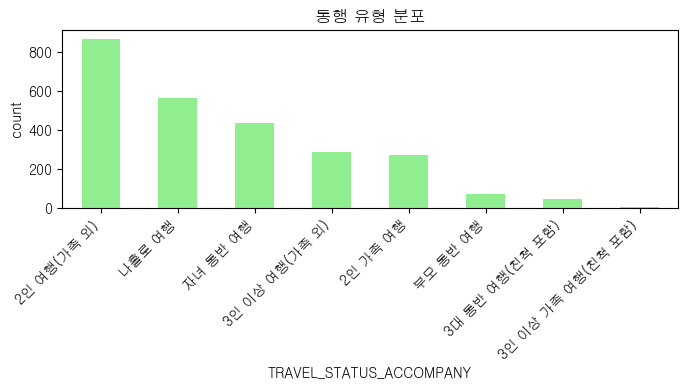

In [72]:
# 동행 유형 빈도를 막대그래프로 표현
plt.figure(figsize=(7,4))
df['TRAVEL_STATUS_ACCOMPANY'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('동행 유형 분포')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 산점도 그리기


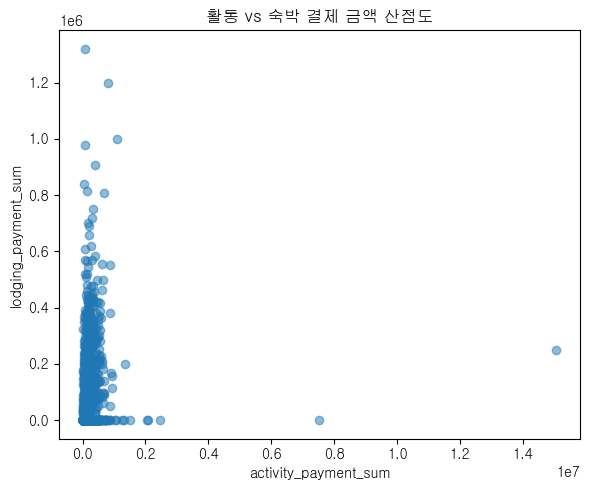

In [73]:
plt.figure(figsize=(6, 5))
plt.scatter(df['activity_payment_sum'], df['lodging_payment_sum'], alpha=0.5)
plt.title('활동 vs 숙박 결제 금액 산점도')
plt.xlabel('activity_payment_sum')
plt.ylabel('lodging_payment_sum')
plt.tight_layout()
plt.show()

## PCA의 2차원 시각화
- PCA 산점도는 여러 여행 관련 지표를 두 개의 주성분 좌표로 축소해 고객 간 유사도와 차이를 한눈에 보여준다.
- PC1: 활동·숙박 지표 전체에 양의 가중치가 적용되어 여행 규모와 체류 기간이 클수록 값이 커진다.
- PC2: 활동 지표(+)와 숙박 지표(-)의 대비로 체험/이동 중심과 숙박 중심 성향 차이를 드러낸다.


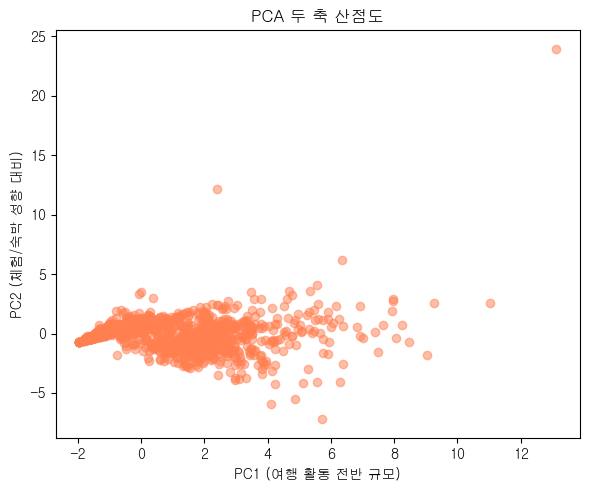

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_cols = ['activity_payment_sum', 'activity_payment_count', 'lodging_payment_sum', 'lodging_payment_count', 'visit_trip_days', 'visit_move_cnt']
scaled = StandardScaler().fit_transform(df[pca_cols])
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
plt.figure(figsize=(6, 5))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5, color='coral')
plt.title('PCA 두 축 산점도')
plt.xlabel('PC1 (여행 활동 전반 규모)')
plt.ylabel('PC2 (체험/숙박 성향 대비)')
plt.tight_layout()
plt.show()


In [75]:
# idea에 필요한 컬럼 확인
df[['visit_dgstfn_avg', 'visit_revisit_avg', 'visit_rcmdtn_avg']].describe()

,visit_dgstfn_avg,visit_revisit_avg,visit_rcmdtn_avg
count,"2,560","2,560","2,560"
mean,4,4,4
std,1,1,1
min,1,1,2
25%,4,4,4
50%,4,4,4
75%,5,5,5
max,5,5,5


In [76]:
# 인구 통계 정보
df[['GENDER', 'AGE_GRP', 'EDU_NM', 'MARR_STTS', 'FAMILY_MEMB', 'JOB_NM', 'INCOME']].head()

,GENDER,AGE_GRP,EDU_NM,MARR_STTS,FAMILY_MEMB,JOB_NM,INCOME
0,남,40,6,2,3,2,7
1,남,30,7,1,1,3,5
2,여,30,5,1,3,3,4
3,여,30,6,1,2,3,4
4,여,60,7,2,1,2,7


In [77]:
# 여행 스타일
df[['TRAVEL_STYL_1','TRAVEL_STYL_2','TRAVEL_STYL_3','TRAVEL_STYL_4','TRAVEL_STYL_5','TRAVEL_STYL_6','TRAVEL_STYL_7','TRAVEL_STYL_8']].head()

,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8
0,5,3,5,4,5,4,2,5
1,3,3,2,4,5,4,3,2
2,3,2,3,3,2,6,4,7
3,5,4,3,2,5,4,5,3
4,3,3,3,4,2,4,6,6


In [78]:
# 여행 목적, 페르소나, 동반 인원, 기간
df[['TRAVEL_PURPOSE', 'TRAVEL_PERSONA', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_TERM', 'MVMN_NM']].head()

,TRAVEL_PURPOSE,TRAVEL_PERSONA,TRAVEL_COMPANIONS_NUM,TRAVEL_TERM,MVMN_NM
0,3,서울 외 수도권 방문/수도권 거주/40세 이상/자녀동반/일반미션,2,2,NaN
1,21,경기 방문/거주지 구분 없음/39세 이하/특별미션,1,3,NaN
2,2;4,서울 외 수도권 방문/수도권 거주/39세 이하/커플/일반미션,1,2,NaN
3,3;6,서울 방문/수도권 외 거주/39세 이하/나홀로 여행/일반미션,0,2,NaN
4,1;21,서울 방문/수도권 외 거주/40세 이상/커플/일반미션,3,2,NaN


In [85]:
# 지출 활동
df[['activity_payment_sum', 'lodging_payment_sum', 'activity_type_unique']]

,activity_payment_sum,lodging_payment_sum,activity_type_unique
0,0,0,2
1,58500,0,6
2,319340,0,5
3,421160,0,5
4,764300,0,6
...,...,...,...
2555,143900,112376,4
2556,2000,0,2
2557,22900,0,2
2558,109500,0,3


In [ ]:
# TRAVEL_MOTIVE_2, TRAVEL_MOTIVE_3 : float -> int
# GENDER : encoding
# TRAVEL_MISSION_CHECK, TRAVEL_PURPOSE : 둘의 내용이 완벽히 일치하면 한 컬럼 제거
# LODGE 컬럼 확인(전처리 때 삭제 되었는지)
# 숫자형 컬럼이 0으로 통일(소비 내역 관련)
# 시각화 할 때 컬럼명 → 한글로
# 문자형 데이터도 시각화('정보 없음') : 숙소명, 지역명,
# 각자 전처리 테이블 -> 설명 -> 시각화 -> 조인 방법 -> **주제 관련 컬럼** -> 변수 확정 -> 최종 테이블 -> EDA
# "주제"를 여러개 선택 -> 스타일, 재방문 의향 -> 타겟 변수 -> ML 방법 여러개 제시

In [81]:
# GENDER 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['GENDER'] = le.fit_transform(df['GENDER'])
df['GENDER'].head()

0    0
1    0
2    1
3    1
4    1
Name: GENDER, dtype: int64

In [84]:
df['TRAVEL_STATUS_ACCOMPANY'].unique()

array(['자녀 동반 여행', '2인 가족 여행', '2인 여행(가족 외)', '나홀로 여행', '3인 이상 여행(가족 외)',
       '부모 동반 여행', '3대 동반 여행(친척 포함)', '3인 이상 가족 여행(친척 포함)'], dtype=object)